##  SONAR Rock vs Mine Prediction

## R : Rock
## M : Mine 

### Predict using logistic regression

In [2]:
# importing data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , accuracy_score

In [5]:
# load data
data = pd.read_csv('sonar data.csv' , header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [6]:
data.shape

(208, 61)

### Preprocessing data

In [7]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

In [10]:
data.isna().sum().sort_values(ascending=False)

60    0
29    0
27    0
26    0
25    0
     ..
35    0
34    0
33    0
32    0
0     0
Length: 61, dtype: int64

In [82]:
# calculate correlation
data.corr()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,1.000000,0.735896,0.571537,0.491438,0.344797,0.238921,0.260815,0.355523,0.353420,0.318276,...,0.254450,0.355299,0.311729,0.322299,0.312067,0.220642,0.313725,0.368132,0.357116,0.347078
1,0.735896,1.000000,0.779916,0.606684,0.419669,0.332329,0.279040,0.334615,0.316733,0.270782,...,0.320538,0.434548,0.346076,0.383960,0.380165,0.262263,0.280341,0.353042,0.352200,0.358761
2,0.571537,0.779916,1.000000,0.781786,0.546141,0.346275,0.190434,0.237884,0.252691,0.219637,...,0.238110,0.394076,0.332914,0.367186,0.289731,0.287661,0.380819,0.334108,0.425047,0.373948
3,0.491438,0.606684,0.781786,1.000000,0.726943,0.352805,0.246440,0.246742,0.247078,0.237769,...,0.174676,0.374651,0.364772,0.334211,0.284955,0.280938,0.340254,0.344865,0.420266,0.400626
4,0.344797,0.419669,0.546141,0.726943,1.000000,0.597053,0.335422,0.204006,0.177906,0.183219,...,0.115936,0.266617,0.314985,0.205306,0.196472,0.199323,0.219395,0.238793,0.290982,0.253710
5,0.238921,0.332329,0.346275,0.352805,0.597053,1.000000,0.702889,0.471683,0.327578,0.288621,...,0.171767,0.252288,0.162404,0.164073,0.133464,0.166758,0.161333,0.203986,0.220573,0.178158
6,0.260815,0.279040,0.190434,0.246440,0.335422,0.702889,1.000000,0.675774,0.470580,0.425448,...,0.184152,0.144051,0.046403,0.163074,0.195541,0.174143,0.186324,0.242646,0.183578,0.222493
7,0.355523,0.334615,0.237884,0.246742,0.204006,0.471683,0.675774,1.000000,0.778577,0.652525,...,0.260692,0.219038,0.102447,0.234008,0.239551,0.276819,0.267212,0.287603,0.194400,0.146216
8,0.353420,0.316733,0.252691,0.247078,0.177906,0.327578,0.470580,0.778577,1.000000,0.877131,...,0.174873,0.207996,0.105352,0.202615,0.179342,0.232764,0.193963,0.231745,0.097293,0.095243
9,0.318276,0.270782,0.219637,0.237769,0.183219,0.288621,0.425448,0.652525,0.877131,1.000000,...,0.167096,0.165537,0.097544,0.146725,0.175254,0.151889,0.140327,0.212277,0.058273,0.097358


<AxesSubplot:>

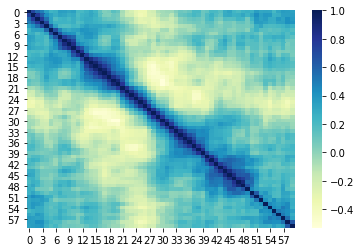

In [84]:
sns.heatmap(data.corr() , cmap='YlGnBu')

In [12]:
data[60].unique()

array(['R', 'M'], dtype=object)

In [30]:
data[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

#### All data in same range and clean

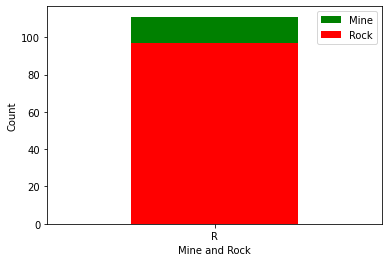

In [31]:
data[data[60] == 'M'][60].value_counts().plot.bar(color='green' , label="Mine")
data[data[60] == 'R'][60].value_counts().plot.bar(color='red' , label = "Rock")
plt.xticks(rotation=0)
plt.xlabel('Mine and Rock')
plt.ylabel('Count')
plt.legend()
plt.show()

In [35]:
X = data.iloc[: , :-1]
y = data.iloc[: , -1]

### Spliting data

In [51]:
X_train , X_test , y_train , y_test = train_test_split(X , y , random_state=42 , test_size=0.3)
X_train.shape

(145, 60)

In [75]:
# create model
model = LogisticRegression(max_iter=100)
model.fit(X_train , y_train)

LogisticRegression()

In [76]:
# get score for X_train and y_train
predict_training_data = model.predict(X_train)
print("********************************************")
print("Score for traing data : " , accuracy_score(y_train , predict_training_data)*100)
print("********************************************")

********************************************
Score for traing data :  85.51724137931035
********************************************


In [78]:
# predict using X_test
predict_testing_data = model.predict(X_test)
predict_testing_data

array(['M', 'R', 'R', 'R', 'M', 'R', 'M', 'M', 'R', 'M', 'M', 'R', 'R',
       'M', 'M', 'M', 'M', 'M', 'M', 'R', 'M', 'M', 'M', 'M', 'R', 'R',
       'R', 'R', 'M', 'M', 'M', 'R', 'R', 'M', 'M', 'R', 'M', 'R', 'R',
       'M', 'R', 'R', 'R', 'M', 'R', 'M', 'M', 'M', 'R', 'R', 'R', 'M',
       'M', 'M', 'M', 'M', 'M', 'R', 'R', 'M', 'M', 'M', 'M'],
      dtype=object)

In [79]:
# calculate score for model prediction
print("********************************************")
print("Score for testing data : " , accuracy_score(y_test , predict_testing_data)*100)
print("********************************************")

********************************************
Score for testing data :  80.95238095238095
********************************************


In [80]:
# Confusion Matrix
CM = confusion_matrix(y_test , predict_testing_data)
CM

array([[30,  5],
       [ 7, 21]], dtype=int64)

In [91]:
# to Test model
#row_test = (0.0491,0.0279,0.0592,0.1270,0.1772,0.1908,0.2217,0.0768,0.1246,0.2028,0.0947,0.2497,0.2209,0.3195,0.3340,0.3323,0.2780,0.2975,0.2948,0.1729,0.3264,0.3834,0.3523,0.5410,0.5228,0.4475,0.5340,0.5323,0.3907,0.3456,0.4091,0.4639,0.5580,0.5727,0.6355,0.7563,0.6903,0.6176,0.5379,0.5622,0.6508,0.4797,0.3736,0.2804,0.1982,0.2438,0.1789,0.1706,0.0762,0.0238,0.0268,0.0081,0.0129,0.0161,0.0063,0.0119,0.0194,0.0140,0.0332,0.0439)  # Acual result : 'M' Predicted result : 'R'            
row_test = (0.0238,0.0318,0.0422,0.0399,0.0788,0.0766,0.0881,0.1143,0.1594,0.2048,0.2652,0.3100,0.2381,0.1918,0.1430,0.1735,0.1781,0.2852,0.5036,0.6166,0.7616,0.8125,0.7793,0.8788,0.8813,0.9470,1.0000,0.9739,0.8446,0.6151,0.4302,0.3165,0.2869,0.2017,0.1206,0.0271,0.0580,0.1262,0.1072,0.1082,0.0360,0.1197,0.2061,0.2054,0.1878,0.2047,0.1716,0.1069,0.0477,0.0170,0.0186,0.0096,0.0071,0.0084,0.0038,0.0026,0.0028,0.0013,0.0035,0.0060)   # Acual result : 'M' Predicted result : 'M'   
row_test = np.asarray(row_test).reshape(1,-1)
result = model.predict(row_test)
print(result)

['M']
